Dataset from Kaggle : https://www.kaggle.com/datasets/dwiknrd/reviewuniversalstudio

In [ ]:
/kaggle/input/reviewuniversalstudio/universal_studio_branches.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

import os

# **Import Data**

In [ ]:
df_review = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CodingWithMe/UniversalReview/universal_studio_branches.csv',encoding='latin-1')

df_review.head()

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. Iâm not review...,Universal Studios Florida
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida


In [ ]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50904 entries, 0 to 50903
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reviewer      50904 non-null  object 
 1   rating        50904 non-null  float64
 2   written_date  50904 non-null  object 
 3   title         50904 non-null  object 
 4   review_text   50904 non-null  object 
 5   branch        50904 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.3+ MB


# **Cleansing**

## **User**

In [ ]:
user = df_review.groupby(['reviewer'])['reviewer'].count().to_dict()
user = pd.DataFrame({'reviewer': list(user.keys()), 'Count': list(user.values())})
user = user.sort_values(by=['Count'], ascending=False)

user

,reviewer,Count
19278,Michael S,20
7205,David S,20
5848,Chris B,18
26918,Steve B,17
22093,Paul C,17
...,...,...
15594,Khine K,1
15595,Kholood Alali,1
15596,Khoo88Colchester,1
15597,KhooCK,1


สร้าง user_id โดยมาจาก index เพื่อใช้แทน reviewer

In [ ]:
user_temp = (user.rename(index=lambda s: s + 1))
#สร้าง user_id = index
user['user_id'] = user_temp.index
user

,reviewer,Count,user_id
19278,Michael S,20,19279
7205,David S,20,7206
5848,Chris B,18,5849
26918,Steve B,17,26919
22093,Paul C,17,22094
...,...,...,...
15594,Khine K,1,15595
15595,Kholood Alali,1,15596
15596,Khoo88Colchester,1,15597
15597,KhooCK,1,15598


In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44086 entries, 19278 to 44085
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewer  44086 non-null  object
 1   Count     44086 non-null  int64 
 2   user_id   44086 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [ ]:
users_cnt = pd.DataFrame(user.groupby('user_id').size(), columns=['count'])

#ดูจำนวน count rating ที่ user เคยให้กับ Disney
users_cnt.sort_values(by=['count'], ascending=True)

,count
user_id,
1,1
29387,1
29388,1
29389,1
29390,1
...,...
14698,1
14699,1
14700,1


In [ ]:
user_rating  = pd.merge(df_review,user, how="outer", on=["reviewer"])
user_rating.drop('Count',axis='columns', inplace=True)
user_rating

,reviewer,rating,written_date,title,review_text,branch,user_id
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,15350
1,Kelly B,4.0,"October 14, 2017",Honeymoon,"This park is pretty cool, unfortunately for us...",Universal Studios Florida,15350
2,Kelly B,4.0,"December 17, 2015",Day cation,What a great place to waste a day. The park wa...,Universal Studios Florida,15350
3,Kelly B,5.0,"March 28, 2015",Pleasantly surprised,Came down a day early for Spring Break and wer...,Universal Studios Florida,15350
4,Kelly B,5.0,"October 22, 2014",Great fun,Even though our children are grown we have sti...,Universal Studios Florida,15350
...,...,...,...,...,...,...,...
50899,Josie,2.0,"May 21, 2010",Should NOT be open yet,While what they have got so far looks like it ...,Universal Studios Singapore,14248
50900,ceno5,3.0,"May 15, 2010",small with very little crowds,most of the rides are functional except for th...,Universal Studios Singapore,32922
50901,Shmonkey,4.0,"May 4, 2010",Just opened- now is a great time to go!,"We went on a Thursday, and hardly had to wait ...",Universal Studios Singapore,26086
50902,vinz20,4.0,"March 29, 2010",I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore,43439


In [ ]:
user_rating.isna().any()

reviewer        False
rating          False
written_date    False
title           False
review_text     False
branch          False
user_id         False
dtype: bool

**ลบข้อมูลรีวิวซ้ำ**

เช็คข้อมูลซ้ำและลบออก เกิดจากกรณีระบบ Error แล้วสร้างรายการรีวิวซ้ำ

In [ ]:
user_rating.drop_duplicates(subset = ['user_id','rating', 'written_date','title','branch'], keep = 'first', inplace = True) 
user_rating

,reviewer,rating,written_date,title,review_text,branch,user_id
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,15350
1,Kelly B,4.0,"October 14, 2017",Honeymoon,"This park is pretty cool, unfortunately for us...",Universal Studios Florida,15350
2,Kelly B,4.0,"December 17, 2015",Day cation,What a great place to waste a day. The park wa...,Universal Studios Florida,15350
3,Kelly B,5.0,"March 28, 2015",Pleasantly surprised,Came down a day early for Spring Break and wer...,Universal Studios Florida,15350
4,Kelly B,5.0,"October 22, 2014",Great fun,Even though our children are grown we have sti...,Universal Studios Florida,15350
...,...,...,...,...,...,...,...
50899,Josie,2.0,"May 21, 2010",Should NOT be open yet,While what they have got so far looks like it ...,Universal Studios Singapore,14248
50900,ceno5,3.0,"May 15, 2010",small with very little crowds,most of the rides are functional except for th...,Universal Studios Singapore,32922
50901,Shmonkey,4.0,"May 4, 2010",Just opened- now is a great time to go!,"We went on a Thursday, and hardly had to wait ...",Universal Studios Singapore,26086
50902,vinz20,4.0,"March 29, 2010",I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore,43439


## **Month-Year**

แยกข้อมูล เดือน-ปี

In [ ]:
user_rating["Year_Month"] = pd.to_datetime(user_rating["written_date"], errors='coerce')
user_rating

,reviewer,rating,written_date,title,review_text,branch,user_id,Year_Month
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,15350,2021-05-30
1,Kelly B,4.0,"October 14, 2017",Honeymoon,"This park is pretty cool, unfortunately for us...",Universal Studios Florida,15350,2017-10-14
2,Kelly B,4.0,"December 17, 2015",Day cation,What a great place to waste a day. The park wa...,Universal Studios Florida,15350,2015-12-17
3,Kelly B,5.0,"March 28, 2015",Pleasantly surprised,Came down a day early for Spring Break and wer...,Universal Studios Florida,15350,2015-03-28
4,Kelly B,5.0,"October 22, 2014",Great fun,Even though our children are grown we have sti...,Universal Studios Florida,15350,2014-10-22
...,...,...,...,...,...,...,...,...
50899,Josie,2.0,"May 21, 2010",Should NOT be open yet,While what they have got so far looks like it ...,Universal Studios Singapore,14248,2010-05-21
50900,ceno5,3.0,"May 15, 2010",small with very little crowds,most of the rides are functional except for th...,Universal Studios Singapore,32922,2010-05-15
50901,Shmonkey,4.0,"May 4, 2010",Just opened- now is a great time to go!,"We went on a Thursday, and hardly had to wait ...",Universal Studios Singapore,26086,2010-05-04
50902,vinz20,4.0,"March 29, 2010",I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore,43439,2010-03-29


สร้าง Column ใหม่ แยก year-month

In [ ]:
user_rating['year'] = pd.DatetimeIndex(user_rating['Year_Month']).year
user_rating['year'] = pd.to_numeric(user_rating['year'])

user_rating['month'] = pd.DatetimeIndex(user_rating['Year_Month']).month
user_rating['month'] = pd.to_numeric(user_rating['month'])

user_rating

,reviewer,rating,written_date,title,review_text,branch,user_id,Year_Month,year,month
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,15350,2021-05-30,2021,5
1,Kelly B,4.0,"October 14, 2017",Honeymoon,"This park is pretty cool, unfortunately for us...",Universal Studios Florida,15350,2017-10-14,2017,10
2,Kelly B,4.0,"December 17, 2015",Day cation,What a great place to waste a day. The park wa...,Universal Studios Florida,15350,2015-12-17,2015,12
3,Kelly B,5.0,"March 28, 2015",Pleasantly surprised,Came down a day early for Spring Break and wer...,Universal Studios Florida,15350,2015-03-28,2015,3
4,Kelly B,5.0,"October 22, 2014",Great fun,Even though our children are grown we have sti...,Universal Studios Florida,15350,2014-10-22,2014,10
...,...,...,...,...,...,...,...,...,...,...
50899,Josie,2.0,"May 21, 2010",Should NOT be open yet,While what they have got so far looks like it ...,Universal Studios Singapore,14248,2010-05-21,2010,5
50900,ceno5,3.0,"May 15, 2010",small with very little crowds,most of the rides are functional except for th...,Universal Studios Singapore,32922,2010-05-15,2010,5
50901,Shmonkey,4.0,"May 4, 2010",Just opened- now is a great time to go!,"We went on a Thursday, and hardly had to wait ...",Universal Studios Singapore,26086,2010-05-04,2010,5
50902,vinz20,4.0,"March 29, 2010",I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore,43439,2010-03-29,2010,3


In [ ]:
user_rating.describe()

,rating,user_id,year,month
count,50855.000000,50855.000000,50855.000000,50855.000000
mean,4.257163,21423.939219,2015.725750,6.547183
std,1.046438,12510.674096,2.311208,3.361221
min,1.000000,1.000000,2002.000000,1.000000
25%,4.000000,10781.500000,2014.000000,4.000000
50%,5.000000,21026.000000,2016.000000,7.000000
75%,5.000000,31931.500000,2017.000000,9.000000
max,5.000000,44086.000000,2021.000000,12.000000


In [ ]:
user_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50855 entries, 0 to 50903
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   reviewer      50855 non-null  object        
 1   rating        50855 non-null  float64       
 2   written_date  50855 non-null  object        
 3   title         50855 non-null  object        
 4   review_text   50855 non-null  object        
 5   branch        50855 non-null  object        
 6   user_id       50855 non-null  int64         
 7   Year_Month    50855 non-null  datetime64[ns]
 8   year          50855 non-null  int64         
 9   month         50855 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 4.3+ MB


# **EDA**

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]//2,y[i], ha = 'center',Size=14)    #//2 คือการเซตค่า count ให้อยู่กลาง bar
        #plt.annotate(ha='center', va='bottom')

#### **ตรวจสอบจำนวนข้อมูล**

In [ ]:
review_total = user_rating.shape[0]
user_total = user_rating.user_id.unique().tolist()
us_branch  = user_rating.branch.unique().tolist()

print('Number of Users: ', review_total)
print('Number of Users: {}'.format(len(user_total)))
print('Number of Universal Branch: {}'.format(len(us_branch)))

Number of Users:  50855
Number of Users: 44086
Number of Universal Branch: 3


#### **เช็คข้อมูล User**

ดูว่ามี User คนใดให้การรีวิวมากกว่า 1 ครั้ง

In [ ]:
users_cnt = pd.DataFrame(user_rating.groupby('user_id').size(), columns=['count'])

#ดูจำนวน count rating ที่ user เคยให้กับ us
users_cnt.sort_values(by=['count'], ascending=False)

,count
user_id,
7206,20
19279,20
5849,18
7194,17
13937,17
...,...
15589,1
15590,1
15591,1


In [ ]:
users_cnt.query('count > 1')

,count
user_id,
40,11
43,3
67,2
174,2
177,2
...,...
43922,2
43931,2
43953,2


#### **Branch**

In [ ]:
user_rating['branch'].value_counts()

Universal Studios Florida      30584
Universal Studios Singapore    15742
Universal Studios Japan         4529
Name: branch, dtype: int64

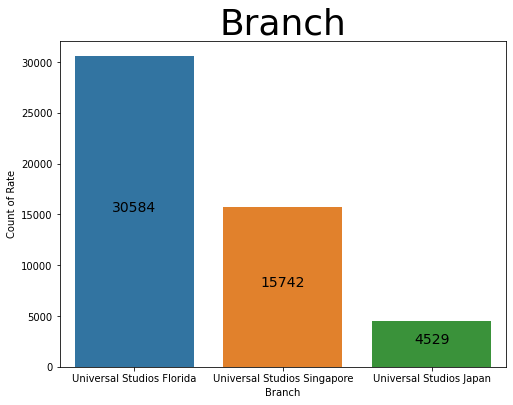

In [ ]:
fig_dims = (8,6)
fig,ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='branch',
              data = user_rating,
              ax=ax, 
              order = user_rating['branch'].value_counts().index)
y_r_Branch = list(user_rating['branch'].value_counts()[0:10])
x_r_Branch = list(user_rating['branch'].value_counts().index[0:10])
plt.xlabel("Branch")
plt.ylabel("Count of Rate")
addlabels(x_r_Branch, y_r_Branch)
plt.title('Branch',fontdict={'fontsize':36})
plt.show()

ความพึงพอใจเฉลี่ยของแต่ละสาขา (Mean Rating)

In [ ]:
#branch_mean = disney_review.groupby("Branch")["Rating"].mean()
branch_mean = pd.DataFrame(user_rating.groupby("branch")["rating"].mean())
branch_mean

,rating
branch,
Universal Studios Florida,4.266708
Universal Studios Japan,4.131376
Universal Studios Singapore,4.274806


#### **Rating**

In [ ]:
user_rating["rating"].value_counts().sort_values()

1.0     1968
2.0     1984
3.0     5226
4.0    13501
5.0    28176
Name: rating, dtype: int64

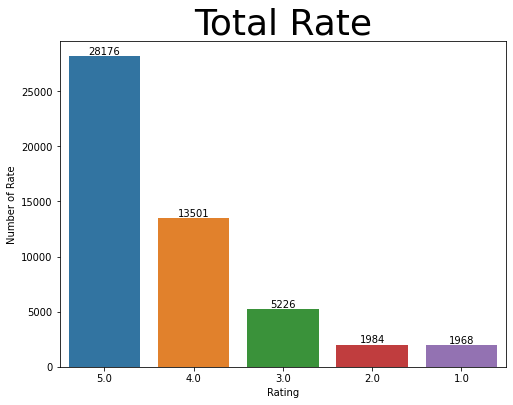

In [ ]:
fig_dims = (8,6)
fig,ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='rating',
              data = user_rating,
              ax=ax, 
              order = user_rating['rating'].value_counts().index)
#y_r_rating = list(user_rating['rating'].value_counts()[0:10])
#x_r_rating = list(user_rating['rating'].value_counts().index[0:10])
plt.xlabel("Rating")
plt.ylabel("Number of Rate")
#addlabels(x_r_rating, y_r_rating)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',(p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='bottom', color='black', size=10)
 
plt.title('Total Rate',fontdict={'fontsize':36})
plt.show()

#### **Year-Month**

In [ ]:
#ตรวจสอบปีที่มีการ Review

user_rating["year"].value_counts().sort_values(ascending=False)

2016    9300
2015    9100
2017    7143
2018    6164
2014    5451
2019    4460
2013    3789
2012    2270
2020     996
2011     992
2010     414
2021     285
2009     169
2008      87
2007      78
2006      60
2004      49
2005      40
2003       7
2002       1
Name: year, dtype: int64

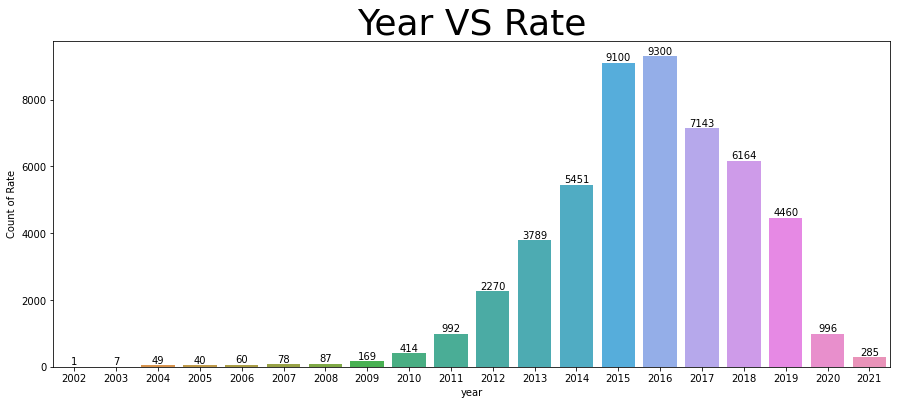

In [ ]:
fig_dims = (15,6)
fig,ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='year',
              data = user_rating,
              ax=ax) 
              #order = user_rating['year'].value_counts().index)
y_r_year = list(user_rating['year'].value_counts()[0:10])
x_r_year = list(user_rating['year'].value_counts().index[0:10])
plt.xlabel("year")
plt.ylabel("Count of Rate")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',(p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='bottom', color='black', size=10)
 
plt.title('Year VS Rate',fontdict={'fontsize':36})
plt.show()

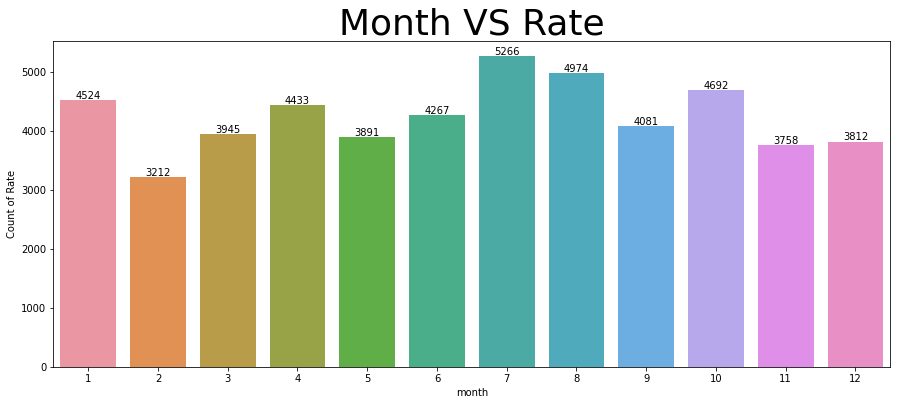

In [ ]:
fig_dims = (15,6)
fig,ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='month',
              data = user_rating,
              ax=ax) 
y_r_month = list(user_rating['month'].value_counts()[0:10])
x_r_month = list(user_rating['month'].value_counts().index[0:10])
plt.xlabel("month")
plt.ylabel("Count of Rate")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',(p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='bottom', color='black', size=10)
 
plt.title('Month VS Rate',fontdict={'fontsize':36})
plt.show()

In [ ]:
us_review = user_rating

# **Clean Text for Analysis**

In [ ]:
us_review['review_corpus'] = us_review['review_text']

In [ ]:
import re
import nltk
from nltk.stem.porter import *
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download("punkt")      #ตัดคำ
nltk.download("stopwords")  #list ของ stopwords
nltk.download('wordnet')

#stopwords = set(nltk.corpus.stopwords.words('english'))
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## **Clean 1** Review corpus

In [ ]:
def stopword_removal(x, stpws=stopwords.words("english")):
  return list(set(x).difference(set(stpws)))

def lemmatization(x, stemmer=PorterStemmer()):
  return [stemmer.stem(i) for i in x]

def number_removal(x):
  return [i for i in x if not i.isnumeric()]

# function for text cleaning
def clean_text(text):
    text = re.sub("\'", "", text)           # remove backslash-apostrophe
    text = re.sub("[^a-zA-Z]"," ",text)     # remove everything not alphabets
    text = ' '.join(text.split())           # remove whitespaces
    text = text.lower()                     # convert text to lowercase
    
    return text

In [ ]:
#จัดการกับ review_text ----> review_corpus
us_review['review_corpus'] = us_review['review_corpus'].apply(lambda x: clean_text(x))

us_review["review_corpus"] = us_review["review_corpus"].apply(lambda x: word_tokenize(x))
us_review["review_corpus"] = us_review["review_corpus"].apply(lambda x: stopword_removal(x))
us_review["review_corpus"] = us_review["review_corpus"].apply(lambda x: lemmatization(x))
us_review["review_corpus"] = us_review["review_corpus"].apply(lambda x: number_removal(x))
us_review["review_corpus"] = us_review["review_corpus"].apply(lambda x: " ".join(x))
corpus_us = us_review["review_corpus"].tolist()

## **Clean 2** Clean Data

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
stopwords = set(nltk.corpus.stopwords.words('english'))

In [ ]:
from tqdm import tqdm
from bs4 import BeautifulSoup
import string

def decontracted(phrase):
    """
    We first define a function to expand the contracted phrase into normal words
    """
    # specific
    phrase = re.sub(r"wont", "will not", phrase)
    phrase = re.sub(r"wouldnt", "would not", phrase)
    phrase = re.sub(r"shouldnt", "should not", phrase)
    phrase = re.sub(r"couldnt", "could not", phrase)
    phrase = re.sub(r"cudnt", "could not", phrase)
    phrase = re.sub(r"cant", "can not", phrase)
    phrase = re.sub(r"dont", "do not", phrase)
    phrase = re.sub(r"doesnt", "does not", phrase)
    phrase = re.sub(r"didnt", "did not", phrase)
    phrase = re.sub(r"wasnt", "was not", phrase)
    phrase = re.sub(r"werent", "were not", phrase)
    phrase = re.sub(r"havent", "have not", phrase)
    phrase = re.sub(r"hadnt", "had not", phrase)

    # general
    phrase = re.sub(r"n\ t", " not", phrase)
    #phrase = re.sub(r"\re", " are", phrase)
    phrase = re.sub(r"\ s ", " is ", phrase) # prime 
    phrase = re.sub(r"\ d ", " would ", phrase)
    phrase = re.sub(r"\ ll ", " will ", phrase)
    phrase = re.sub(r"\dunno", "do not ", phrase)
    phrase = re.sub(r"ive ", "i have ", phrase)
    phrase = re.sub(r"im ", "i am ", phrase)
    phrase = re.sub(r"i m ", "i am ", phrase)
    phrase = re.sub(r" w ", " with ", phrase)
    
    return phrase

In [ ]:
def preprocessing(df):
    """
    Clean the review texts
    """
    cleaned_review = []    
    stemmer = PorterStemmer()

    for review_text in tqdm(us_review['review_text']):
        
        review_text = review_text.lower()  
        # expand the contracted words
        review_text = decontracted(review_text)
        
        #remove html tags
        review_text = BeautifulSoup(review_text, 'lxml').get_text().strip() # re.sub(r'<.*?>', '', text)
        
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
        #remove url 
        review_text = re.sub(r'https?://\S+|www\.\S+', '', review_text)
        
        #Removing punctutation, string.punctuation in python consists of !"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`
        review_text = review_text.translate(str.maketrans('', '', string.punctuation))

        # remove emails
        review_text = re.sub(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", '', review_text)
        review_text = review_text.split()
        review_text = [stemmer.stem(word) for word in review_text if word not in stopwords]
        review_text = " ".join(review_text)
    
        cleaned_review.append(review_text)
        
    return cleaned_review

In [ ]:
us_review['cleaned_data'] = preprocessing(us_review)

100%|██████████| 50855/50855 [02:13<00:00, 379.58it/s]


In [ ]:
us_review.head()

,reviewer,rating,written_date,title,review_text,branch,user_id,Year_Month,year,month,review_corpus,cleaned_data
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,15350,2021-05-30,2021,5,line share paid restroom day park tri water la...,went univers memori day weekend total train wr...
1,Kelly B,4.0,"October 14, 2017",Honeymoon,"This park is pretty cool, unfortunately for us...",Universal Studios Florida,15350,2017-10-14,2017,10,littl sorri sell children plenti pop though ri...,park pretti cool unfortun us que hour long rid...
2,Kelly B,4.0,"December 17, 2015",Day cation,What a great place to waste a day. The park wa...,Universal Studios Florida,15350,2015-12-17,2015,12,whole day wast someth use place two cool purch...,great place wast day park fun someth everyon p...
3,Kelly B,5.0,"March 28, 2015",Pleasantly surprised,Came down a day early for Spring Break and wer...,Universal Studios Florida,15350,2015-03-28,2015,3,everyth want line slow full hit prepar day ove...,came day earli spring break prepar overpack da...
4,Kelly B,5.0,"October 22, 2014",Great fun,Even though our children are grown we have sti...,Universal Studios Florida,15350,2014-10-22,2014,10,plan children believ day though without tow be...,eve nothough children grown still continu vaca...


In [ ]:
list_cleaned_data = us_review["cleaned_data"].tolist()

In [ ]:
print(us_review['review_text'][20284])
print()
print(us_review['cleaned_data'][20284])
print()
print(us_review['review_corpus'][20284])

As nanny there with my nanny family I though the staff were amazing. Our guide was knowledgeable, the place was clean and organised. Honestly the highlight of our trip. Can't wait to return next year.

nanni nanni famili though staff amaz guid knowledg place clean organis honestli highlight trip wait return next year

guid cant return clean highlight honestli year wait trip amaz next knowledg though nanni staff famili organis place


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

us_review['token_clean'] = us_review['cleaned_data'].apply(lambda x: word_tokenize(x))
#us_review['token_corpus'] = us_review['review_corpus'].apply(lambda x: word_tokenize(x))
us_review

,reviewer,rating,written_date,title,review_text,branch,user_id,Year_Month,year,month,review_corpus,cleaned_data,token_clean
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,15350,2021-05-30,2021,5,line share paid restroom day park tri water la...,went univers memori day weekend total train wr...,"[went, univers, memori, day, weekend, total, t..."
1,Kelly B,4.0,"October 14, 2017",Honeymoon,"This park is pretty cool, unfortunately for us...",Universal Studios Florida,15350,2017-10-14,2017,10,littl sorri sell children plenti pop though ri...,park pretti cool unfortun us que hour long rid...,"[park, pretti, cool, unfortun, us, que, hour, ..."
2,Kelly B,4.0,"December 17, 2015",Day cation,What a great place to waste a day. The park wa...,Universal Studios Florida,15350,2015-12-17,2015,12,whole day wast someth use place two cool purch...,great place wast day park fun someth everyon p...,"[great, place, wast, day, park, fun, someth, e..."
3,Kelly B,5.0,"March 28, 2015",Pleasantly surprised,Came down a day early for Spring Break and wer...,Universal Studios Florida,15350,2015-03-28,2015,3,everyth want line slow full hit prepar day ove...,came day earli spring break prepar overpack da...,"[came, day, earli, spring, break, prepar, over..."
4,Kelly B,5.0,"October 22, 2014",Great fun,Even though our children are grown we have sti...,Universal Studios Florida,15350,2014-10-22,2014,10,plan children believ day though without tow be...,eve nothough children grown still continu vaca...,"[eve, nothough, children, grown, still, contin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50899,Josie,2.0,"May 21, 2010",Should NOT be open yet,While what they have got so far looks like it ...,Universal Studios Singapore,14248,2010-05-21,2010,5,noth children far day pizza children food valu...,got far look like amaz found quit unbeliev pla...,"[got, far, look, like, amaz, found, quit, unbe..."
50900,ceno5,3.0,"May 15, 2010",small with very little crowds,most of the rides are functional except for th...,Universal Studios Singapore,32922,2010-05-15,2010,5,entir meal time wast went though use tuesday f...,ride function except one madagascar small coul...,"[ride, function, except, one, madagascar, smal..."
50901,Shmonkey,4.0,"May 4, 2010",Just opened- now is a great time to go!,"We went on a Thursday, and hardly had to wait ...",Universal Studios Singapore,26086,2010-05-04,2010,5,good littl necessari children avail went food ...,went thursday hardli wait line park wonder att...,"[went, thursday, hardli, wait, line, park, won..."
50902,vinz20,4.0,"March 29, 2010",I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore,43439,2010-03-29,2010,3,local line court delight staff answer first fo...,first visit univers studio theme park went par...,"[first, visit, univers, studio, theme, park, w..."


## **Compare Clean**

### **1 Review Corpus**

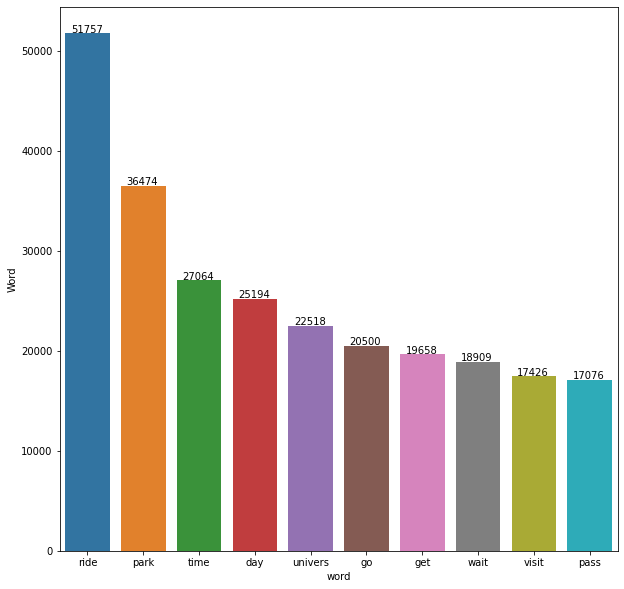

In [ ]:
all_words_review_corpus = ' '.join([text for text in us_review['review_corpus']])
all_words_review_corpus = all_words_review_corpus.split()
  
fdist_corpus = nltk.FreqDist(all_words_review_corpus)
words_df_corpus = pd.DataFrame({'word':list(fdist_corpus.keys()), 'count':list(fdist_corpus.values())})

d_corpus = words_df_corpus.nlargest(10 ,['count'], keep='all') 
plt.figure(figsize=(10,10))
ax = sns.barplot(data=d_corpus, y= "count", x = "word")
ax.set(ylabel = 'Word')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.show()

In [ ]:
words_df_corpus.shape

(24984, 2)

In [ ]:
#เลือกคำสูงสุด 15 อันดับ
words_df_corpus.sort_values(by=['count'], ascending=False).head(15)

,word,count
83,ride,51757
5,park,36474
80,time,27064
4,day,25194
96,univers,22518
145,go,20500
93,get,19658
37,wait,18909
192,visit,17426
25,pass,17076


### **2 Cleaned Data**

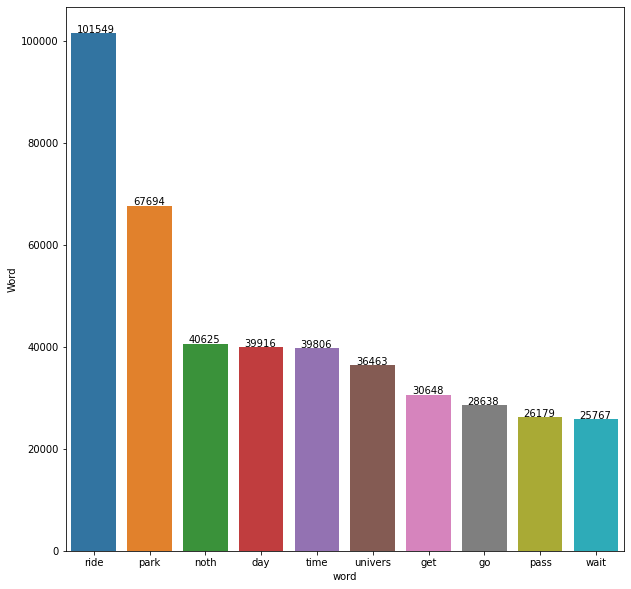

In [ ]:
all_words_cleaned_data = ' '.join([text for text in us_review['cleaned_data']])
all_words_cleaned_data = all_words_cleaned_data.split()
  
fdist_clean = nltk.FreqDist(all_words_cleaned_data)
words_df_clean = pd.DataFrame({'word':list(fdist_clean.keys()), 'count':list(fdist_clean.values())})

d_clean = words_df_clean.nlargest(10 ,['count'], keep='all') 
plt.figure(figsize=(10,10))
ax = sns.barplot(data=d_clean, y= "count", x = "word")
ax.set(ylabel = 'Word')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.show()

In [ ]:
words_df_clean.shape

(25704, 2)

In [ ]:
#เลือกคำสูงสุด 15 อันดับ
words_df_clean.sort_values(by=['count'], ascending=False).head(15)

,word,count
60,ride,101549
11,park,67694
10,noth,40625
3,day,39916
19,time,39806
1,univers,36463
9,get,30648
149,go,28638
22,pass,26179
8,wait,25767


# **Check Point Save Data**

หลังจาก Clean เรียบร้อยแล้ว

In [ ]:
us_review.to_csv('/content/drive/MyDrive/Colab Notebooks/CodingWithMe/UniversalReview/1_all_column.csv')

In [ ]:
us_review.head(2)

,reviewer,rating,written_date,title,review_text,branch,user_id,Year_Month,year,month,review_corpus,cleaned_data,token_clean
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,15350,2021-05-30,2021,5,line share paid restroom day park tri water la...,went univers memori day weekend total train wr...,"[went, univers, memori, day, weekend, total, t..."
1,Kelly B,4.0,"October 14, 2017",Honeymoon,"This park is pretty cool, unfortunately for us...",Universal Studios Florida,15350,2017-10-14,2017,10,littl sorri sell children plenti pop though ri...,park pretti cool unfortun us que hour long rid...,"[park, pretti, cool, unfortun, us, que, hour, ..."


เลือก Column ที่จะต้องนำไปใช้

user_id, rating, review_text, branch, year, month,	review_corpus, cleaned_data	,token_clean,	token_corpus

In [ ]:
select_us = us_review[['user_id','rating','review_text','branch','year','month','review_corpus','cleaned_data','token_clean']]
select_us.head()

,user_id,rating,review_text,branch,year,month,review_corpus,cleaned_data,token_clean
0,15350,2.0,We went to Universal over Memorial Day weekend...,Universal Studios Florida,2021,5,line share paid restroom day park tri water la...,went univers memori day weekend total train wr...,"[went, univers, memori, day, weekend, total, t..."
1,15350,4.0,"This park is pretty cool, unfortunately for us...",Universal Studios Florida,2017,10,littl sorri sell children plenti pop though ri...,park pretti cool unfortun us que hour long rid...,"[park, pretti, cool, unfortun, us, que, hour, ..."
2,15350,4.0,What a great place to waste a day. The park wa...,Universal Studios Florida,2015,12,whole day wast someth use place two cool purch...,great place wast day park fun someth everyon p...,"[great, place, wast, day, park, fun, someth, e..."
3,15350,5.0,Came down a day early for Spring Break and wer...,Universal Studios Florida,2015,3,everyth want line slow full hit prepar day ove...,came day earli spring break prepar overpack da...,"[came, day, earli, spring, break, prepar, over..."
4,15350,5.0,Even though our children are grown we have sti...,Universal Studios Florida,2014,10,plan children believ day though without tow be...,eve nothough children grown still continu vaca...,"[eve, nothough, children, grown, still, contin..."


In [ ]:
select_us.to_csv('/content/drive/MyDrive/Colab Notebooks/CodingWithMe/UniversalReview/2_select_column.csv')

# **WordCloud**

## **WordCloud All Review**

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

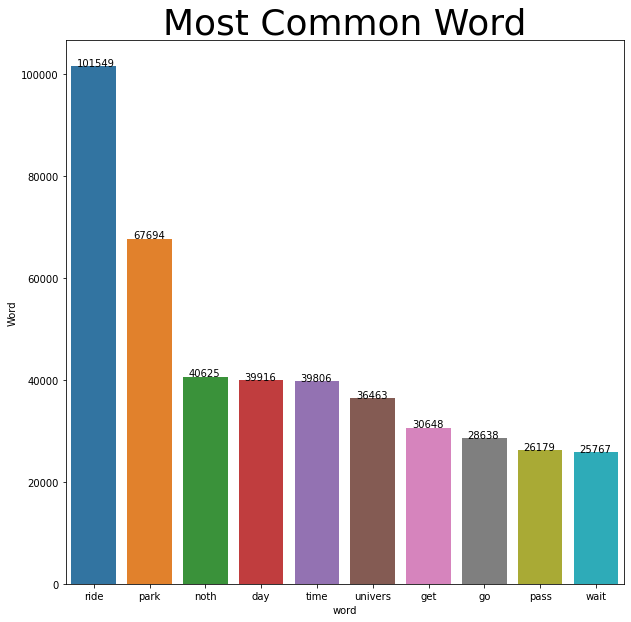

In [ ]:
all_words = ' '.join([text for text in us_review['cleaned_data']])
all_words = all_words.split()
  
fdist = nltk.FreqDist(all_words)
words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

d_corpus = words_df.nlargest(10 ,['count'], keep='all') 
plt.figure(figsize=(10,10))
ax = sns.barplot(data=d_corpus, y= "count", x = "word" )
ax.set(ylabel = 'Word')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.title('Most Common Word',fontdict={'fontsize':36})
print()
plt.show()

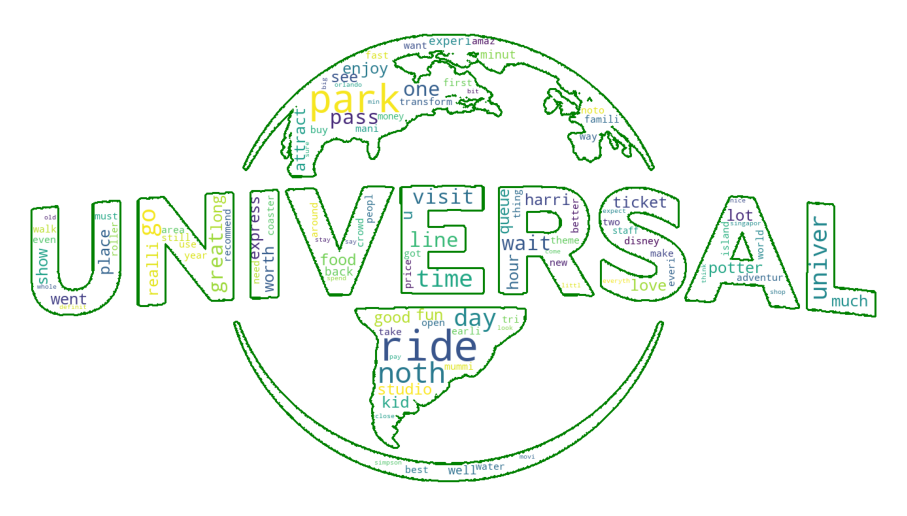

In [ ]:
word_all_review = " ".join(text for text in us_review['cleaned_data'])
mickey = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/CodingWithMe/UniversalReview/Universal_Pictures_logo.png"))
wordcloud_review = WordCloud(collocations = False , background_color = 'white', mask = mickey,#mode='RGB',
                             contour_width=2, 
                            repeat=True,
                            min_font_size=10,contour_color='green')
wordcloud_review.generate(word_all_review)

wordcloud_review.to_file("/content/drive/MyDrive/Colab Notebooks/CodingWithMe/UniversalReview/wordcloud_allreview.png")
plt.figure(figsize = (16,15))
plt.imshow(wordcloud_review)
#plt.imshow(wordcloud_review.recolor(color_func=image_colors), cmap=plt.cm.gray, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
len(word_all_review)

17981863

## **WordCloud by Branch**

In [ ]:
img_usa = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/CodingWithMe/UniversalReview/usa.png"))
img_jp = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/CodingWithMe/UniversalReview/jp.png"))
img_sg = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/CodingWithMe/UniversalReview/sg.png"))

### **Japan**

In [ ]:
look_jp = us_review[us_review['branch'] == "Universal Studios Japan"]

allword_jp = look_jp['cleaned_data'].str.split(expand=True).stack()
count_jp = allword_jp.value_counts().reset_index()
count_jp.columns =['Word', 'Frequency']
word_jp = " ".join(text for text in allword_jp)

count_jp.shape

(7993, 2)

In [ ]:
#เลือกคำสูงสุด 15 อันดับ
count_jp.sort_values(by=['Frequency'], ascending=False).head(15)

,Word,Frequency
0,ride,9108
1,park,5048
2,time,4637
3,harri,4103
4,potter,3942
5,noth,3868
6,pass,3726
7,get,3500
8,day,3171
9,wait,3087


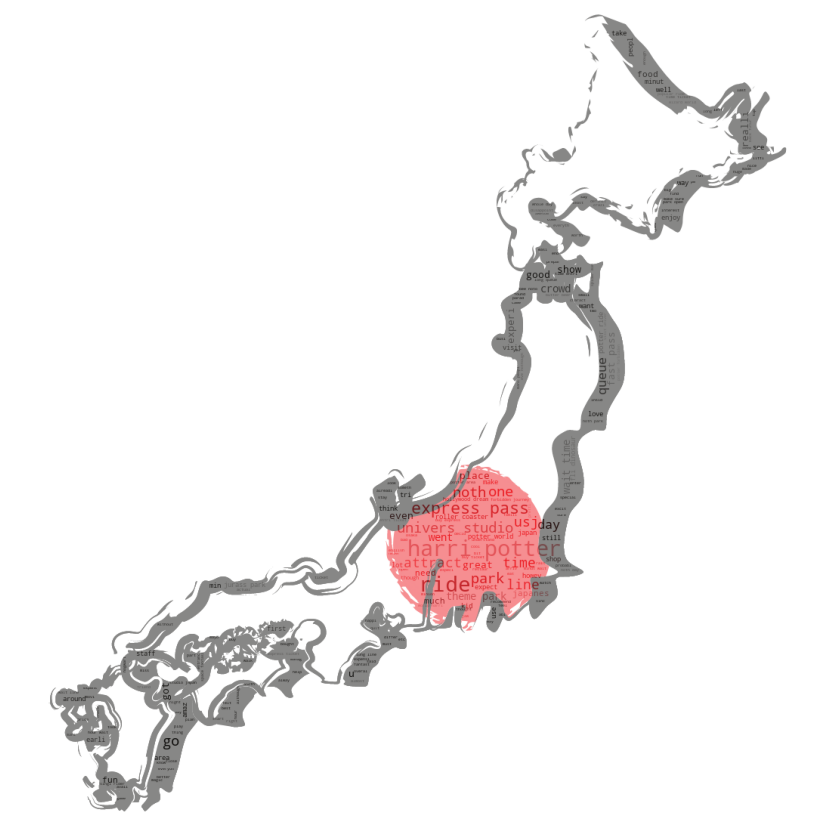

In [ ]:
image_colors = ImageColorGenerator(img_jp)

wc_jp = WordCloud(stopwords=STOPWORDS, 
                        background_color="white", 
                        mode="RGBA", 
                        max_words=1000, 
                        #contour_width=3, 
                        repeat=False,
                        min_font_size=5,
                        mask=img_jp)

#text = open("data/birthday_text.txt").read()
wc_jp.generate(word_jp)
wc_jp.recolor(color_func = image_colors)

plt.figure(figsize=[15, 15])

jp_img = Image.fromarray(wc_jp.to_array())
jp_mask_img = Image.fromarray(img_jp)

jp_map = Image.blend(jp_img, 
                      jp_mask_img, 
                      0.5)
wc_jp.to_file("/content/drive/MyDrive/Colab Notebooks/CodingWithMe/UniversalReview/wordcloud_jp.png")
plt.imshow(jp_map)
plt.axis("off")
plt.show()

### **Singapore**

In [ ]:
look_sg = us_review[us_review['branch'] == "Universal Studios Singapore"]

allword_sg = look_sg['cleaned_data'].str.split(expand=True).stack()
count_sg = allword_sg.value_counts().reset_index()
count_sg.columns =['Word', 'Frequency']
word_sg = " ".join(text for text in allword_sg)

count_sg.shape

(13343, 2)

In [ ]:
#เลือกคำสูงสุด 15 อันดับ
count_sg.sort_values(by=['Frequency'], ascending=False).head(15)

,Word,Frequency
0,ride,31447
1,park,12792
2,day,11653
3,time,11252
4,noth,10687
5,univers,7990
6,go,7796
7,get,7541
8,visit,7422
9,wait,7153


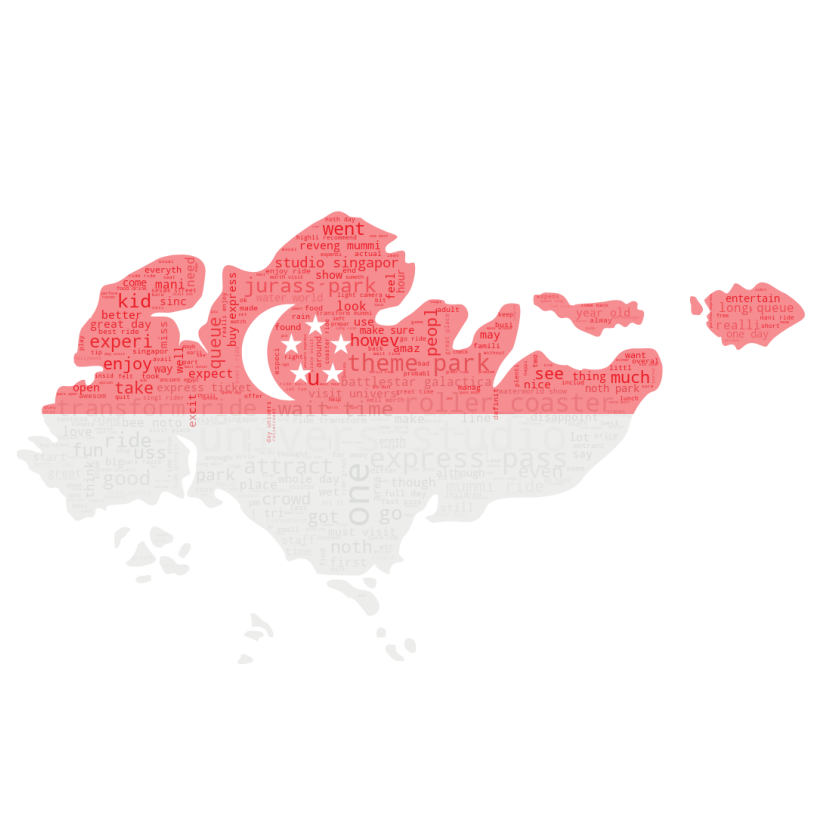

In [ ]:
image_colors = ImageColorGenerator(img_sg)

wc_sg = WordCloud(stopwords=STOPWORDS, 
                        background_color="white", 
                        mode="RGBA", 
                        max_words=1000, 
                        #contour_width=3, 
                        repeat=False,
                        min_font_size=5,
                        mask=img_sg)
#text = open("data/birthday_text.txt").read()
wc_sg.generate(word_sg)
wc_sg.recolor(color_func = image_colors)

plt.figure(figsize=[15, 15])

sg_img = Image.fromarray(wc_sg.to_array())
sg_mask_img = Image.fromarray(img_sg)

sg_map = Image.blend(sg_img, 
                      sg_mask_img, 
                      0.5)
wc_sg.to_file("/content/drive/MyDrive/Colab Notebooks/CodingWithMe/UniversalReview/wordcloud_sg.png")
plt.imshow(sg_map)
plt.axis("off")
plt.show()

### **Florida**

In [ ]:
look_usa = us_review[us_review['branch'] == "Universal Studios Florida"]

allword_usa = look_usa['cleaned_data'].str.split(expand=True).stack()
count_usa = allword_sg.value_counts().reset_index()
count_usa.columns =['Word', 'Frequency']
word_usa = " ".join(text for text in allword_usa)

count_usa.shape

(13343, 2)

In [ ]:
#เลือกคำสูงสุด 15 อันดับ
count_usa.sort_values(by=['Frequency'], ascending=False).head(15)

,Word,Frequency
0,ride,31447
1,park,12792
2,day,11653
3,time,11252
4,noth,10687
5,univers,7990
6,go,7796
7,get,7541
8,visit,7422
9,wait,7153


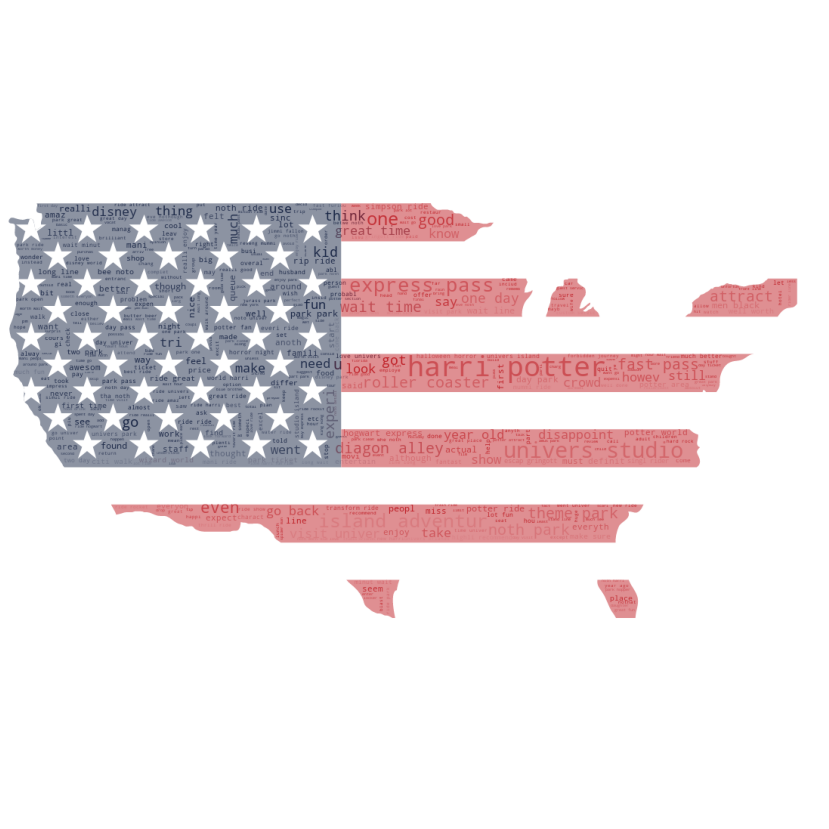

In [ ]:
image_colors = ImageColorGenerator(img_usa)

wc_usa = WordCloud(stopwords=STOPWORDS, 
                        background_color="white", 
                        mode="RGBA", 
                        max_words=1000, 
                        #contour_width=3, 
                        repeat=False,
                        min_font_size=5,
                        mask=img_usa)
#text = open("data/birthday_text.txt").read()
wc_usa.generate(word_usa)
wc_usa.recolor(color_func = image_colors)

plt.figure(figsize=[15, 15])

usa_img = Image.fromarray(wc_usa.to_array())
usa_mask_img = Image.fromarray(img_usa)

usa_map = Image.blend(usa_img, 
                      usa_mask_img, 
                      0.5)
wc_usa.to_file("/content/drive/MyDrive/Colab Notebooks/CodingWithMe/UniversalReview/wordcloud_usa.png")
plt.imshow(usa_map)
plt.axis("off")
plt.show()

# Notes :

นอกจากนี้ยังสามารถจับ Rating แยกอออกมาวิเคราะห์เพื่อดูคำที่ปรากฎแต่ละ Rating ได้

เจอกันใหม่ Part 2 for Sentiment Label

## **Image for WordCloud**

!!!!! Image Background = White color 

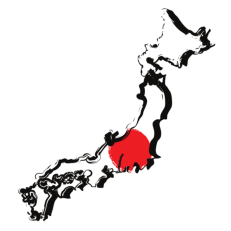

In [ ]:
#เช็ครูปภาพก่อนนำไปทำ WordCloud รูปต้องพื้นหลังสีขาวเท่านั้น

img = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/CodingWithMe/UniversalReview/jp.png"))
#img1[230:250, 240:250]
plt.imshow(img)
plt.axis("off")
plt.show()